In [2]:
import seaborn as sns

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [6]:
data=make_blobs(n_samples=200,n_features=3,centers=4,cluster_std=1.8,random_state=101)

In [7]:
type(data)

tuple

In [8]:
data

(array([[-5.67412565e+00,  1.67093047e+00, -5.22700133e+00],
        [ 3.81985071e+00, -3.95984714e-01, -1.07657369e+01],
        [-6.09870803e+00,  7.21223544e+00,  5.49168271e+00],
        [-6.73918279e+00,  4.14835615e+00,  7.14842186e+00],
        [-4.58250581e+00,  4.66921484e+00,  4.39003226e+00],
        [-6.96056466e-01,  8.42494418e+00,  5.38474571e+00],
        [-4.23602455e+00,  2.00497073e+00, -2.69704710e+00],
        [-5.37639530e+00,  6.37617043e+00,  3.54178287e+00],
        [-3.61070512e+00,  4.55820317e-01, -4.88866696e+00],
        [-6.30409123e+00,  2.39250023e+00,  5.38173971e+00],
        [-4.24633998e+00,  8.45725390e+00,  2.59600394e+00],
        [-4.08800717e-01,  2.03172227e+00, -9.07721990e+00],
        [-6.83691686e+00,  2.13047838e+00, -3.66511968e+00],
        [-6.21618157e+00, -6.16851951e-01, -1.83007045e+00],
        [-8.70891639e+00, -2.97826021e-01, -8.06315452e-01],
        [ 1.03092267e+00,  1.71378008e+00, -9.09841212e+00],
        [-7.61425625e+00

In [12]:
data[0].shape

(200, 3)

# data visualisation

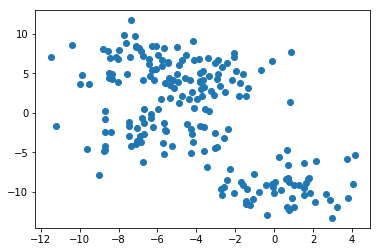

In [17]:
plt.scatter(data[0][:,0],data[0][:,2])

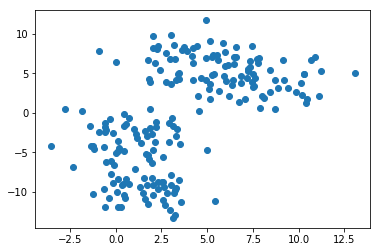

In [18]:
plt.scatter(data[0][:,1],data[0][:,2])

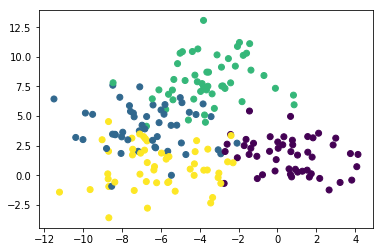

In [19]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

In [30]:
from mpl_toolkits import mplot3d

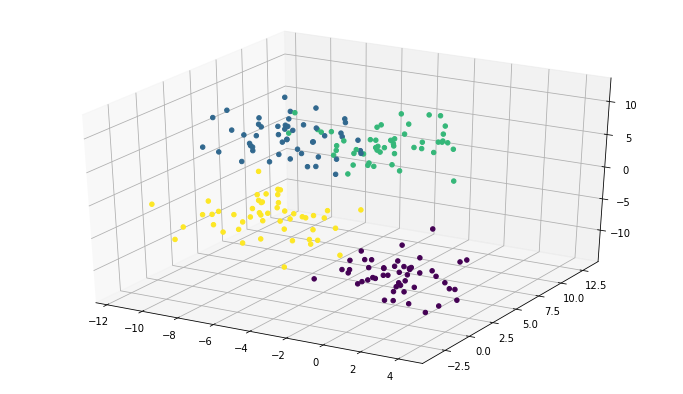

In [43]:
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
#ax.plot3D(data[0][:,0], data[0][:,1],data[0][:,2])
ax.scatter3D(data[0][:,0], data[0][:,1],data[0][:,2],c=data[1],depthshade=False)


# creating cluster

In [44]:
from sklearn.cluster import KMeans


In [46]:
Kmeans=KMeans(n_clusters=4)

In [48]:
Kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
Kmeans.cluster_centers_

array([[ 0.50554559,  1.65729628, -9.39338612],
       [-6.72089232,  4.205672  ,  6.59811568],
       [-6.1266857 ,  0.73659482, -2.80290502],
       [-3.23514884,  8.19973709,  3.79995573]])

In [50]:
#predicting clusters
Kmeans.labels_

array([2, 0, 1, 1, 1, 3, 2, 3, 2, 1, 3, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 1, 0, 3, 0, 2, 3, 2, 0, 1, 3, 3, 2, 0, 2, 1, 0,
       1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 0, 1, 2,
       1, 0, 2, 3, 1, 2, 0, 3, 2, 1, 0, 3, 1, 2, 0, 3, 1, 3, 2, 0, 1, 0,
       2, 1, 3, 1, 2, 2, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 0, 2, 2, 3, 1,
       3, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 3, 3, 0, 2, 1, 0, 2, 1, 1, 0,
       3, 1, 1, 0, 3, 2, 2, 1, 3, 0, 0, 0, 3, 2, 2, 1, 2, 0, 3, 2, 1, 3,
       0, 3, 3, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 0, 3, 3, 1, 1, 1, 1, 0,
       2, 3, 3, 3, 1, 3, 2, 3, 0, 3, 2, 0, 3, 0, 3, 0, 2, 2, 3, 1, 3, 1,
       3, 3])

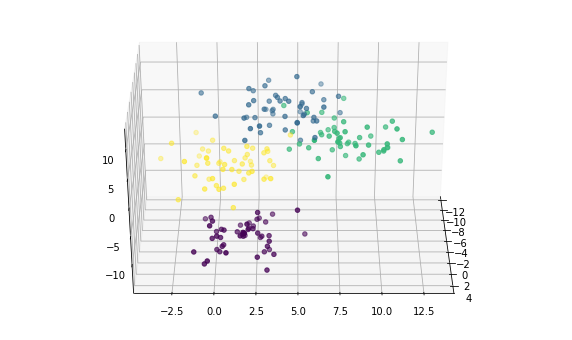

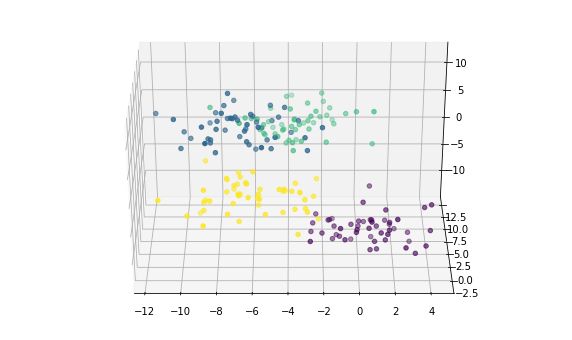

In [83]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=False,figsize=(10,6))
ax1.set_title("kmeans")
ax1= plt.axes(projection='3d')
ax1.scatter3D(data[0][:,0], data[0][:,1],data[0][:,2],c=Kmeans.labels_)
ax2.set_title("original")
ax2= plt.axes(projection='3d')
ax2.scatter3D(data[0][:,0], data[0][:,1],data[0][:,2],c=data[1])
for i in range(0, 360, 90):
    ax2.view_init(None, i)
    plt.show()
fig

In [82]:
# to find optimal values of k

In [76]:
sum_of_squared_distance=[]
k=range(1,21)
for K in k:
    km=KMeans(n_clusters=K)
    km=km.fit(data[0])
    sum_of_squared_distance.append(km.inertia_)

In [77]:
sum_of_squared_distance

[13154.390780284713,
 5047.272814434539,
 2913.431187579429,
 2020.8638490374321,
 1856.630803945758,
 1713.0324896860832,
 1593.4875463185613,
 1471.8576589589445,
 1370.2094462538203,
 1265.8213174906195,
 1185.6304902864679,
 1089.4403641548165,
 1025.912946557508,
 985.2700393590028,
 923.9762654889635,
 883.8394966434778,
 834.9214251181439,
 816.9824736614748,
 767.8616974781344,
 753.6549102523331]

Text(0.5, 1.0, 'the elbow method')

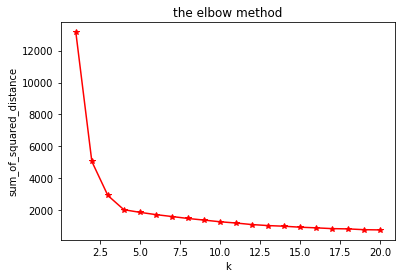

In [79]:
plt.plot(k,sum_of_squared_distance,'r*-')
plt.ylabel("sum_of_squared_distance")
plt.xlabel("k")
plt.title("the elbow method")